In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import weak_sauce as ws
import weak_sauce.data_tools
from weak_sauce.grid import MoveableGrid
import weak_sauce.shifted_cmap
from astropy.io import fits

In [2]:
data_mg = MoveableGrid('/nfs/slac/g/ki/ki19/des/mbaumer/ccd_mg_model_fits/des_chip04_maxit100000_step0.5_decay0.0001/mg.pkl')
full_amp_img = fits.getdata('/nfs/slac/g/ki/ki19/des/mbaumer/DES_flatcor_supercal/coadds/coadd_r_04.fits')
full_amp_img = full_amp_img[100:-100,200:924]
#data_mg = MoveableGrid('/nfs/slac/g/ki/ki19/lsst/mbaumer/ccd_mg_model_fits/lsst_amp03_maxit100000_step0.1_decay0.0/best_mg.pkl') 
#full_amp_img = np.load('../data/lsst_ultraflat_75ke_amp3.npy')
#full_amp_img = full_amp_img[100:-100,100:-100]

fitted = ws.data_tools.fitIlluminationVariation(full_amp_img)
data_rel_flux_map = (full_amp_img-fitted)/fitted+1

/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


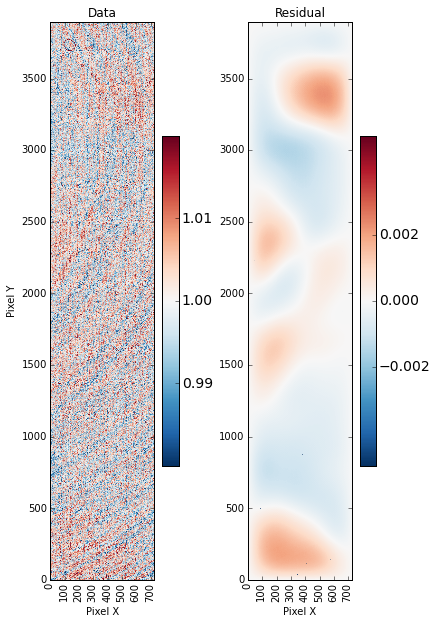

In [3]:
fig,axs = plt.subplots(1,2,figsize=(6.5,10),sharey=False,sharex=False)

plt.sca(axs[0])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('Data')

im = axs[0].imshow(data_rel_flux_map,vmin=.98,vmax=1.02,cmap=plt.cm.RdBu_r,origin='lower')
cbar = plt.colorbar(im,ax=axs[0],ticks=[.99,1,1.01],fraction=0.1)
cbar.ax.tick_params(labelsize=14) 
axs[0].set_ylabel('Pixel Y')
axs[0].set_xlabel('Pixel X')
axs[1].set_xlabel('Pixel X')

plt.sca(axs[1])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('Residual')

im = axs[1].imshow((data_rel_flux_map-data_mg.source.fluxes.T)/data_rel_flux_map,vmin=-0.005,vmax=0.005,cmap=plt.cm.RdBu_r,origin='lower')
cbar = plt.colorbar(im,ax=axs[1],ticks=[-0.002,0,0.002],fraction=0.1)
#cbar.set_ticklabels(['-1e-3','0','5e-5'])
cbar.ax.tick_params(labelsize=14) 
#plt.tight_layout()
plt.savefig('figure7.eps', format='eps', dpi=300)

In [ ]:
#had to revert to previous illumination correction to match that used in intial fit that was so good!

0.82185976369327496

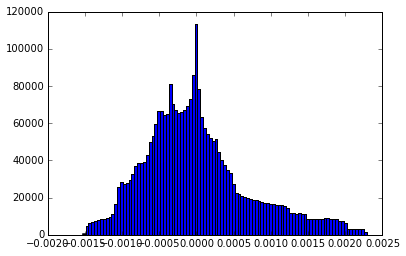

In [5]:
resid = (data_rel_flux_map-data_mg.source.fluxes.T)/data_rel_flux_map
masked = np.ma.masked_where(np.abs(resid)>0.01,resid)
plt.hist(masked.compressed(),bins=100)
(0.004-np.std(masked))/0.004

In [6]:
np.std(masked)

0.00071256094522690022

In [7]:
np.std(data_rel_flux_map)

0.008278581310879083

In [8]:
np.std(masked)/np.std(data_rel_flux_map)

0.086072832828314044

In [17]:
np.mean(data_rel_flux_map)

1.0000000003364438

In [18]:
np.mean(masked)

0.00079658445592853963